# Applied Machine Learning data transformation code

In [198]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import datetime

In [199]:
dataset = pd.read_csv("Retirement Raw Data.csv")

In [200]:
dataset.head()

,ID Key,Location,Department,Directorate,Cost Centre,Grade Name,FTE,End Date,Gender,Date of Birth,Pension Scheme,Termination Reason,Date Eligible for Retirement
0,1,WY,WY CT1,Operations,575,HEO,0.00,20/12/2017,M,14/03/1956,Other,RETIREMENT,14/03/2016
1,2,DM,Registration Services,Operations,1470,SEO,0.49,NaN,M,22/07/1955,Alpha,NaN,05/06/2021
2,3,FY,Fylde,0,250,G6,0.00,31/10/2013,M,21/07/1956,Other,RETIREMENT,21/07/2016
3,4,PB,Registration Services,Operations,1470,HEO,0.49,29/04/2021,M,09/05/1955,Alpha,RESIGNATION,05/04/2021
4,5,GL,Gloucester Office,0,175,HEO,0.00,31/05/2014,M,31/03/1954,Other,RETIREMENT,31/03/2014


In [201]:
len(dataset)
dataset.shape

(8962, 13)

##### Adding columns to the DataFrame:
1. The difference between End Date and Date Eligible for Retirement
1. Calculate Age from Date of Birth
1. Retirement Reason True = RETIREMENT or FALSE = Any other reason.


##### The difference between End Date and Date Eligible for Retirement

In [202]:
date_series = dataset[['End Date', 'Date Eligible for Retirement']].apply(pd.to_datetime)

print(date_series.dtypes)

End Date                        datetime64[ns]
Date Eligible for Retirement    datetime64[ns]
dtype: object


In [203]:
date_series = ((date_series['End Date'] - date_series['Date Eligible for Retirement'])/np.timedelta64(1, 'Y'))
date_series = date_series.astype(float)
print(date_series)

0        1.768688
1             NaN
2       -2.721480
3       -0.013690
4        0.167012
5        0.000000
6        1.656434
7             NaN
8             NaN
9        2.904919
10      -0.238198
11       2.026051
12      -1.839874
13      -0.027379
14       0.679001
15      -1.919273
16      -0.090351
17       0.098565
18            NaN
19      -0.925413
20      -0.167012
21       6.321827
22            NaN
23            NaN
24      -4.648966
25            NaN
26      -1.467518
27       0.084875
28       3.041815
29            NaN
          ...    
8932          NaN
8933          NaN
8934          NaN
8935          NaN
8936   -33.128675
8937          NaN
8938          NaN
8939          NaN
8940          NaN
8941          NaN
8942          NaN
8943          NaN
8944          NaN
8945          NaN
8946          NaN
8947          NaN
8948          NaN
8949          NaN
8950          NaN
8951          NaN
8952          NaN
8953          NaN
8954          NaN
8955          NaN
8956      

In [204]:
diffs = date_series.to_frame(name='Retirement Difference')

In [205]:
diffs.head()

,Retirement Difference
0,1.768688
1,NaN
2,-2.721480
3,-0.013690
4,0.167012


In [206]:
joined = [dataset, diffs]

adj_data = pd.concat(joined, axis=1, join='inner')

#### Calculate Age from Date of Birth

In [207]:
date_series2 = adj_data[['End Date', 'Date of Birth']].apply(pd.to_datetime)

In [208]:
print(date_series2.dtypes)

End Date         datetime64[ns]
Date of Birth    datetime64[ns]
dtype: object


In [209]:
date_series2 = ((date_series2['End Date'] - date_series2['Date of Birth'])/np.timedelta64(1, 'Y'))
date_series2 = date_series2.astype(float)
print(date_series2)

0       61.769920
1             NaN
2       57.279752
3       65.649534
4       60.168244
5       60.001232
6       67.552380
7             NaN
8             NaN
9       67.533214
10      65.926063
11      62.027283
12      64.203919
13      59.973853
14      66.002724
15      58.081959
16      65.961656
17      60.099797
18            NaN
19      64.907561
20      59.834220
21      68.806341
22            NaN
23            NaN
24      60.844507
25            NaN
26      64.611867
27      60.086107
28      63.043047
29            NaN
          ...    
8932          NaN
8933          NaN
8934          NaN
8935          NaN
8936    34.965810
8937          NaN
8938          NaN
8939          NaN
8940          NaN
8941          NaN
8942          NaN
8943          NaN
8944          NaN
8945          NaN
8946          NaN
8947          NaN
8948          NaN
8949          NaN
8950          NaN
8951          NaN
8952          NaN
8953          NaN
8954          NaN
8955          NaN
8956      

In [210]:
age_calc = date_series2.to_frame(name='Age')

age_calc.head()

,Age
0,61.769920
1,NaN
2,57.279752
3,65.649534
4,60.168244


In [211]:
age_joined = [adj_data, age_calc]

adj_data = pd.concat(age_joined, axis=1, join='inner')

#### Retirement Reason True = RETIREMENT or FALSE = Any other reason

In [212]:
adj_data['Outcome'] = np.where(adj_data['Termination Reason'] != 'RETIREMENT', False, True)

In [213]:
adj_data.head()

,ID Key,Location,Department,Directorate,Cost Centre,Grade Name,FTE,End Date,Gender,Date of Birth,Pension Scheme,Termination Reason,Date Eligible for Retirement,Retirement Difference,Age,Outcome
0,1,WY,WY CT1,Operations,575,HEO,0.00,20/12/2017,M,14/03/1956,Other,RETIREMENT,14/03/2016,1.768688,61.769920,True
1,2,DM,Registration Services,Operations,1470,SEO,0.49,NaN,M,22/07/1955,Alpha,NaN,05/06/2021,NaN,NaN,False
2,3,FY,Fylde,0,250,G6,0.00,31/10/2013,M,21/07/1956,Other,RETIREMENT,21/07/2016,-2.721480,57.279752,True
3,4,PB,Registration Services,Operations,1470,HEO,0.49,29/04/2021,M,09/05/1955,Alpha,RESIGNATION,05/04/2021,-0.013690,65.649534,False
4,5,GL,Gloucester Office,0,175,HEO,0.00,31/05/2014,M,31/03/1954,Other,RETIREMENT,31/03/2014,0.167012,60.168244,True


In [214]:
len(adj_data)
adj_data.shape

(8962, 16)

In [215]:
adj_data.dtypes

ID Key                            int64
Location                         object
Department                       object
Directorate                      object
Cost Centre                       int64
Grade Name                       object
FTE                             float64
End Date                         object
Gender                           object
Date of Birth                    object
Pension Scheme                   object
Termination Reason               object
Date Eligible for Retirement     object
Retirement Difference           float64
Age                             float64
Outcome                            bool
dtype: object

##### Reviewing NULL data rows and removing them

In [216]:
adj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8962 entries, 0 to 8961
Data columns (total 16 columns):
ID Key                          8962 non-null int64
Location                        8962 non-null object
Department                      8962 non-null object
Directorate                     8962 non-null object
Cost Centre                     8962 non-null int64
Grade Name                      8962 non-null object
FTE                             8962 non-null float64
End Date                        1739 non-null object
Gender                          8962 non-null object
Date of Birth                   8962 non-null object
Pension Scheme                  8962 non-null object
Termination Reason              1739 non-null object
Date Eligible for Retirement    8954 non-null object
Retirement Difference           1738 non-null float64
Age                             1739 non-null float64
Outcome                         8962 non-null bool
dtypes: bool(1), float64(3), int64(2), object(

After reviewing the data I do not need to worry about using .dropna method as the null rows will represent employees that are still active.

In [217]:
dropped_rows = adj_data.dropna()

In [218]:
dropped_rows.head()

,ID Key,Location,Department,Directorate,Cost Centre,Grade Name,FTE,End Date,Gender,Date of Birth,Pension Scheme,Termination Reason,Date Eligible for Retirement,Retirement Difference,Age,Outcome
0,1,WY,WY CT1,Operations,575,HEO,0.00,20/12/2017,M,14/03/1956,Other,RETIREMENT,14/03/2016,1.768688,61.769920,True
2,3,FY,Fylde,0,250,G6,0.00,31/10/2013,M,21/07/1956,Other,RETIREMENT,21/07/2016,-2.721480,57.279752,True
3,4,PB,Registration Services,Operations,1470,HEO,0.49,29/04/2021,M,09/05/1955,Alpha,RESIGNATION,05/04/2021,-0.013690,65.649534,False
4,5,GL,Gloucester Office,0,175,HEO,0.00,31/05/2014,M,31/03/1954,Other,RETIREMENT,31/03/2014,0.167012,60.168244,True
5,6,FY,Fylde,0,250,SEO,0.00,07/06/2013,M,07/06/1953,Other,RETIREMENT,07/06/2013,0.000000,60.001232,True


In [219]:
len(dropped_rows)
dropped_rows.shape

(1738, 16)

In [220]:
dropped_rows.isnull().any()

ID Key                          False
Location                        False
Department                      False
Directorate                     False
Cost Centre                     False
Grade Name                      False
FTE                             False
End Date                        False
Gender                          False
Date of Birth                   False
Pension Scheme                  False
Termination Reason              False
Date Eligible for Retirement    False
Retirement Difference           False
Age                             False
Outcome                         False
dtype: bool

I will drop the fields Department, Directorate, Cost Centre and FTE as they relate more to enable planning after the modelling has been completed and also contain a mix of data that will be impossible to clean for consistency given the movement of cost centres between Directorates.

In [221]:
reduced_data = dropped_rows.drop(columns=['Department','Directorate','Cost Centre','FTE'])

In [222]:
reduced_data.head()

,ID Key,Location,Grade Name,End Date,Gender,Date of Birth,Pension Scheme,Termination Reason,Date Eligible for Retirement,Retirement Difference,Age,Outcome
0,1,WY,HEO,20/12/2017,M,14/03/1956,Other,RETIREMENT,14/03/2016,1.768688,61.769920,True
2,3,FY,G6,31/10/2013,M,21/07/1956,Other,RETIREMENT,21/07/2016,-2.721480,57.279752,True
3,4,PB,HEO,29/04/2021,M,09/05/1955,Alpha,RESIGNATION,05/04/2021,-0.013690,65.649534,False
4,5,GL,HEO,31/05/2014,M,31/03/1954,Other,RETIREMENT,31/03/2014,0.167012,60.168244,True
5,6,FY,SEO,07/06/2013,M,07/06/1953,Other,RETIREMENT,07/06/2013,0.000000,60.001232,True


In [223]:
len(reduced_data)
reduced_data.shape

(1738, 12)

In [224]:
reduced_data.dtypes

ID Key                            int64
Location                         object
Grade Name                       object
End Date                         object
Gender                           object
Date of Birth                    object
Pension Scheme                   object
Termination Reason               object
Date Eligible for Retirement     object
Retirement Difference           float64
Age                             float64
Outcome                            bool
dtype: object

#### Adjusting some DataFrame columns from object to category
1. Location
1. Grade Name
1. Gender
1. Pension Scheme

##### Location

In [225]:
reduced_data['Location'] = reduced_data['Location'].astype('category')
reduced_data.dtypes

ID Key                             int64
Location                        category
Grade Name                        object
End Date                          object
Gender                            object
Date of Birth                     object
Pension Scheme                    object
Termination Reason                object
Date Eligible for Retirement      object
Retirement Difference            float64
Age                              float64
Outcome                             bool
dtype: object

In [226]:
reduced_data['Location_cat'] = reduced_data['Location'].cat.codes
reduced_data.head()

,ID Key,Location,Grade Name,End Date,Gender,Date of Birth,Pension Scheme,Termination Reason,Date Eligible for Retirement,Retirement Difference,Age,Outcome,Location_cat
0,1,WY,HEO,20/12/2017,M,14/03/1956,Other,RETIREMENT,14/03/2016,1.768688,61.769920,True,14
2,3,FY,G6,31/10/2013,M,21/07/1956,Other,RETIREMENT,21/07/2016,-2.721480,57.279752,True,5
3,4,PB,HEO,29/04/2021,M,09/05/1955,Alpha,RESIGNATION,05/04/2021,-0.013690,65.649534,False,10
4,5,GL,HEO,31/05/2014,M,31/03/1954,Other,RETIREMENT,31/03/2014,0.167012,60.168244,True,6
5,6,FY,SEO,07/06/2013,M,07/06/1953,Other,RETIREMENT,07/06/2013,0.000000,60.001232,True,5


#### Grade Name

In [227]:
reduced_data['Grade Name'] = reduced_data['Grade Name'].astype('category')
reduced_data.dtypes

ID Key                             int64
Location                        category
Grade Name                      category
End Date                          object
Gender                            object
Date of Birth                     object
Pension Scheme                    object
Termination Reason                object
Date Eligible for Retirement      object
Retirement Difference            float64
Age                              float64
Outcome                             bool
Location_cat                        int8
dtype: object

In [228]:
reduced_data['Grade Name_cat'] = reduced_data['Grade Name'].cat.codes
reduced_data.head()

,ID Key,Location,Grade Name,End Date,Gender,Date of Birth,Pension Scheme,Termination Reason,Date Eligible for Retirement,Retirement Difference,Age,Outcome,Location_cat,Grade Name_cat
0,1,WY,HEO,20/12/2017,M,14/03/1956,Other,RETIREMENT,14/03/2016,1.768688,61.769920,True,14,8
2,3,FY,G6,31/10/2013,M,21/07/1956,Other,RETIREMENT,21/07/2016,-2.721480,57.279752,True,5,5
3,4,PB,HEO,29/04/2021,M,09/05/1955,Alpha,RESIGNATION,05/04/2021,-0.013690,65.649534,False,10,8
4,5,GL,HEO,31/05/2014,M,31/03/1954,Other,RETIREMENT,31/03/2014,0.167012,60.168244,True,6,8
5,6,FY,SEO,07/06/2013,M,07/06/1953,Other,RETIREMENT,07/06/2013,0.000000,60.001232,True,5,11


#### Gender

In [229]:
reduced_data['Gender'] = reduced_data['Gender'].astype('category')
reduced_data.dtypes

ID Key                             int64
Location                        category
Grade Name                      category
End Date                          object
Gender                          category
Date of Birth                     object
Pension Scheme                    object
Termination Reason                object
Date Eligible for Retirement      object
Retirement Difference            float64
Age                              float64
Outcome                             bool
Location_cat                        int8
Grade Name_cat                      int8
dtype: object

In [230]:
reduced_data['Gender_cat'] = reduced_data['Gender'].cat.codes
reduced_data.head()

,ID Key,Location,Grade Name,End Date,Gender,Date of Birth,Pension Scheme,Termination Reason,Date Eligible for Retirement,Retirement Difference,Age,Outcome,Location_cat,Grade Name_cat,Gender_cat
0,1,WY,HEO,20/12/2017,M,14/03/1956,Other,RETIREMENT,14/03/2016,1.768688,61.769920,True,14,8,1
2,3,FY,G6,31/10/2013,M,21/07/1956,Other,RETIREMENT,21/07/2016,-2.721480,57.279752,True,5,5,1
3,4,PB,HEO,29/04/2021,M,09/05/1955,Alpha,RESIGNATION,05/04/2021,-0.013690,65.649534,False,10,8,1
4,5,GL,HEO,31/05/2014,M,31/03/1954,Other,RETIREMENT,31/03/2014,0.167012,60.168244,True,6,8,1
5,6,FY,SEO,07/06/2013,M,07/06/1953,Other,RETIREMENT,07/06/2013,0.000000,60.001232,True,5,11,1


#### Pension Scheme

In [231]:
reduced_data['Pension Scheme'] = reduced_data['Pension Scheme'].astype('category')
reduced_data.dtypes

ID Key                             int64
Location                        category
Grade Name                      category
End Date                          object
Gender                          category
Date of Birth                     object
Pension Scheme                  category
Termination Reason                object
Date Eligible for Retirement      object
Retirement Difference            float64
Age                              float64
Outcome                             bool
Location_cat                        int8
Grade Name_cat                      int8
Gender_cat                          int8
dtype: object

In [232]:
reduced_data['Pension Scheme_cat'] = reduced_data['Pension Scheme'].cat.codes
reduced_data.head()

,ID Key,Location,Grade Name,End Date,Gender,Date of Birth,Pension Scheme,Termination Reason,Date Eligible for Retirement,Retirement Difference,Age,Outcome,Location_cat,Grade Name_cat,Gender_cat,Pension Scheme_cat
0,1,WY,HEO,20/12/2017,M,14/03/1956,Other,RETIREMENT,14/03/2016,1.768688,61.769920,True,14,8,1,2
2,3,FY,G6,31/10/2013,M,21/07/1956,Other,RETIREMENT,21/07/2016,-2.721480,57.279752,True,5,5,1,2
3,4,PB,HEO,29/04/2021,M,09/05/1955,Alpha,RESIGNATION,05/04/2021,-0.013690,65.649534,False,10,8,1,0
4,5,GL,HEO,31/05/2014,M,31/03/1954,Other,RETIREMENT,31/03/2014,0.167012,60.168244,True,6,8,1,2
5,6,FY,SEO,07/06/2013,M,07/06/1953,Other,RETIREMENT,07/06/2013,0.000000,60.001232,True,5,11,1,2


In [233]:
len(reduced_data)
reduced_data.shape

(1738, 16)

### Data Analysis

#### Visualising data to check if the dataset is unbalanced and for inconsistent values

##### Gender

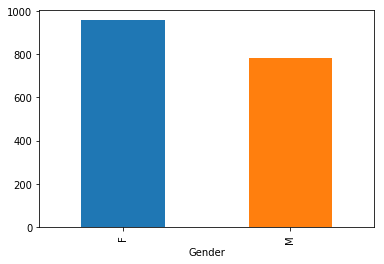

In [234]:
gender_df = reduced_data['Gender'].value_counts().to_frame('Count').rename_axis('Gender').reset_index()

gender_df.plot.bar(x='Gender',y='Count', legend=False)

##### Pension Scheme

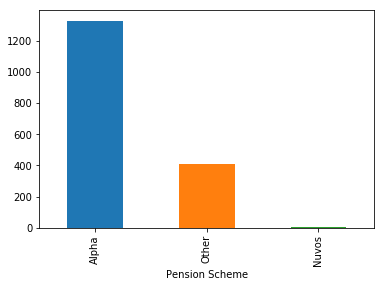

In [235]:
pension_df = reduced_data['Pension Scheme'].value_counts().to_frame('Count').rename_axis('Pension Scheme').reset_index()

pension_df.plot.bar(x='Pension Scheme',y='Count', legend=False)

##### Location

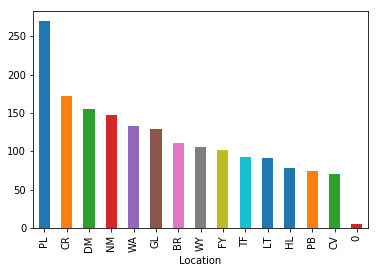

In [236]:
location_df = reduced_data['Location'].value_counts().to_frame('Count').rename_axis('Location').reset_index()

location_df.plot.bar(x='Location',y='Count', legend=False)

##### Grade

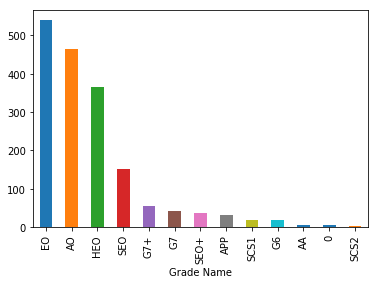

In [237]:
grade_df = reduced_data['Grade Name'].value_counts().to_frame('Count').rename_axis('Grade Name').reset_index()

grade_df.plot.bar(x='Grade Name',y='Count', legend=False)

In [238]:
cleaned_data = reduced_data[reduced_data.Location != '0']

In [239]:
cleaned_data.to_csv('Cleaned Data.csv', index=0)

In [240]:
cleaned_data = pd.read_csv("Cleaned Data.csv")

In [241]:
cleaned_data.head()

,ID Key,Location,Grade Name,End Date,Gender,Date of Birth,Pension Scheme,Termination Reason,Date Eligible for Retirement,Retirement Difference,Age,Outcome,Location_cat,Grade Name_cat,Gender_cat,Pension Scheme_cat
0,1,WY,HEO,20/12/2017,M,14/03/1956,Other,RETIREMENT,14/03/2016,1.768688,61.769920,True,14,8,1,2
1,3,FY,G6,31/10/2013,M,21/07/1956,Other,RETIREMENT,21/07/2016,-2.721480,57.279752,True,5,5,1,2
2,4,PB,HEO,29/04/2021,M,09/05/1955,Alpha,RESIGNATION,05/04/2021,-0.013690,65.649534,False,10,8,1,0
3,5,GL,HEO,31/05/2014,M,31/03/1954,Other,RETIREMENT,31/03/2014,0.167012,60.168244,True,6,8,1,2
4,6,FY,SEO,07/06/2013,M,07/06/1953,Other,RETIREMENT,07/06/2013,0.000000,60.001232,True,5,11,1,2


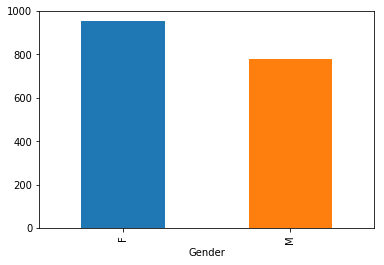

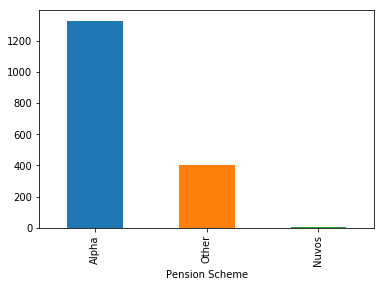

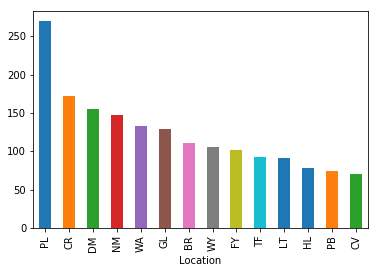

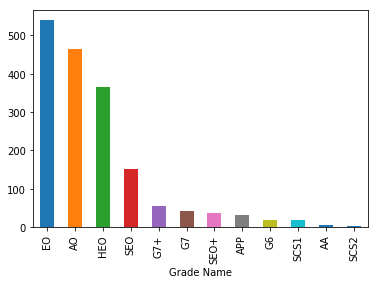

In [242]:
gender_df = cleaned_data['Gender'].value_counts().to_frame('Count').rename_axis('Gender').reset_index()
pension_df = cleaned_data['Pension Scheme'].value_counts().to_frame('Count').rename_axis('Pension Scheme').reset_index()
location_df = cleaned_data['Location'].value_counts().to_frame('Count').rename_axis('Location').reset_index()
grade_df = cleaned_data['Grade Name'].value_counts().to_frame('Count').rename_axis('Grade Name').reset_index()
 
gender_df.plot.bar(x='Gender',y='Count', legend=False)
pension_df.plot.bar(x='Pension Scheme',y='Count', legend=False)
location_df.plot.bar(x='Location',y='Count', legend=False)
grade_df.plot.bar(x='Grade Name',y='Count', legend=False)    
    
plt.show()


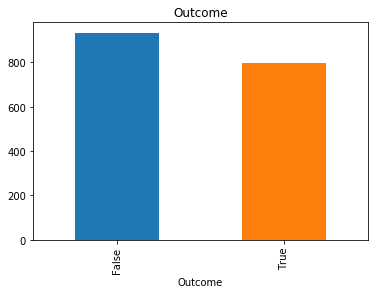

In [243]:
outcome_df = cleaned_data['Outcome'].value_counts().to_frame('Count').rename_axis('Outcome').reset_index()

outcome_df.plot.bar(x='Outcome',y='Count', legend=False, title='Outcome')

In [244]:
cleaned_data['Outcome'].sum()

798

#### Review of features

In [245]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 16 columns):
ID Key                          1733 non-null int64
Location                        1733 non-null object
Grade Name                      1733 non-null object
End Date                        1733 non-null object
Gender                          1733 non-null object
Date of Birth                   1733 non-null object
Pension Scheme                  1733 non-null object
Termination Reason              1733 non-null object
Date Eligible for Retirement    1733 non-null object
Retirement Difference           1733 non-null float64
Age                             1733 non-null float64
Outcome                         1733 non-null bool
Location_cat                    1733 non-null int64
Grade Name_cat                  1733 non-null int64
Gender_cat                      1733 non-null int64
Pension Scheme_cat              1733 non-null int64
dtypes: bool(1), float64(2), int64(5), object(8)
m

#### Correlation review

In [246]:
cleaned_data.corr()

,ID Key,Retirement Difference,Age,Outcome,Location_cat,Grade Name_cat,Gender_cat,Pension Scheme_cat
ID Key,1.000000,-0.731166,-0.715034,-0.748571,-0.031146,-0.419684,0.042557,-0.459277
Retirement Difference,-0.731166,1.000000,0.989783,0.783359,0.012942,0.377114,-0.047253,0.557045
Age,-0.715034,0.989783,1.000000,0.747867,0.013266,0.380762,-0.057181,0.441079
Outcome,-0.748571,0.783359,0.747867,1.000000,0.025014,0.290927,-0.030645,0.594547
Location_cat,-0.031146,0.012942,0.013266,0.025014,1.000000,0.000524,0.051952,0.006650
Grade Name_cat,-0.419684,0.377114,0.380762,0.290927,0.000524,1.000000,0.086616,0.184193
Gender_cat,0.042557,-0.047253,-0.057181,-0.030645,0.051952,0.086616,1.000000,0.043006
Pension Scheme_cat,-0.459277,0.557045,0.441079,0.594547,0.006650,0.184193,0.043006,1.000000


## Need to display this in a better way!

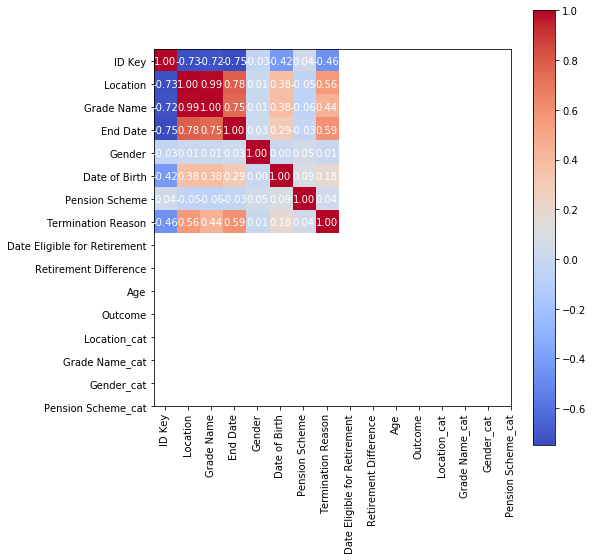

In [247]:
plt.imshow(cleaned_data.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(cleaned_data.columns)), cleaned_data.columns, rotation=90)
plt.yticks(range(len(cleaned_data.columns)), cleaned_data.columns)
plt.gcf().set_size_inches(8,8)

labels = cleaned_data.corr().values
for y in range(labels.shape[0]):
    for x in range(labels.shape[1]):
        plt.text(x, y, '{:.2f}'.format(labels[y, x]), ha='center', va='center', color='white')

In [248]:
cleaned_data.to_csv('Test - Train Modelling Data.csv', index=False)